# Predicting News Category using Machine Learning and NLP

## 1. Problem Definition

Given text data about a news, can we predict the category of that news?

## 2. Data
 Downloaded from Kaggle
 https://www.kaggle.com/rmisra/news-category-dataset

## 3. Features

category: Category article belongs to

headline: Headline of the article

authors: Person authored the article

link: Link to the post

short_description: Short description of the article

date: Date the article was published

## Prepating the Tools


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import casual_tokenize, word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

## Load Data

In [2]:
df = pd.read_json("News_Category_Dataset_v2.json", lines = True)
df.shape

(200853, 6)

## Data Preprocessing

In [3]:
df.describe()

,authors,category,date,headline,link,short_description
count,200853,200853,200853,200853,200853,200853
unique,27993,41,2309,199344,200812,178353
top,,POLITICS,2013-01-17 00:00:00,Sunday Roundup,https://www.huffingtonpost.comhttp://www.busin...,
freq,36620,32739,100,90,2,19712
first,NaN,NaN,2012-01-28 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2018-05-26 00:00:00,NaN,NaN,NaN


In [4]:
# Looking for missing values
df.isna().sum()

authors              0
category             0
date                 0
headline             0
link                 0
short_description    0
dtype: int64

In [5]:
df.head(10)

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."
5,Ron Dicker,ENTERTAINMENT,2018-05-26,Morgan Freeman 'Devastated' That Sexual Harass...,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ..."
6,Ron Dicker,ENTERTAINMENT,2018-05-26,Donald Trump Is Lovin' New McDonald's Jingle I...,https://www.huffingtonpost.com/entry/donald-tr...,"It's catchy, all right."
7,Todd Van Luling,ENTERTAINMENT,2018-05-26,What To Watch On Amazon Prime That’s New This ...,https://www.huffingtonpost.com/entry/amazon-pr...,There's a great mini-series joining this week.
8,Andy McDonald,ENTERTAINMENT,2018-05-26,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,https://www.huffingtonpost.com/entry/mike-myer...,"Myer's kids may be pushing for a new ""Powers"" ..."
9,Todd Van Luling,ENTERTAINMENT,2018-05-26,What To Watch On Hulu That’s New This Week,https://www.huffingtonpost.com/entry/hulu-what...,You're getting a recent Academy Award-winning ...


#### We can combine "headline" and "short_description" columns to make the feature extraction easy

In [6]:
df["text"] = df.headline + " " + df.short_description
df.head(5)

,authors,category,date,headline,link,short_description,text
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 5...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...


In [7]:
# Dropping redundant columns
df = df.drop(["headline","short_description", "link","authors","date"], axis  = 1)
df[:10]

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...
6,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle I...
7,ENTERTAINMENT,What To Watch On Amazon Prime That’s New This ...
8,ENTERTAINMENT,Mike Myers Reveals He'd 'Like To' Do A Fourth ...
9,ENTERTAINMENT,What To Watch On Hulu That’s New This Week You...


In [8]:
#Checking the frequency of each category  
df.category.value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

#### We can see that some categories can be treated as one e.e College and Education, Parenting and Parents etc

In [9]:
culture = ['ARTS & CULTURE', 'ARTS', 'CULTURE & ARTS']
home_living = ['HOME & LIVING', 'HEALTHY LIVING', 'WELLNESS']
fashion = ['STYLE', 'STYLE & BEAUTY']
entertainment = ['COMEDY', 'ENTERTAINMENT', 'MEDIA']
business = ['MONEY', 'BUSINESS']
parenting = ['PARENTING', 'PARENTS']
technology = ['SCIENCE', 'TECH']
education = ['COLLEGE', 'EDUCATION']
drop = ['BLACK VOICES', 'DIVORCE', 'FIFTY', 'GOOD NEWS', 'IMPACT', 'LATINO VOICES', 'WOMEN', 
        'QUEER VOICES', 'TASTE', 'THE WORLDPOST', 'WORLD NEWS', 'WORLDPOST', 'GREEN', 'WEIRD NEWS', 'DIVORCE', ]

In [10]:
new_df = df[~df.category.isin(drop)]
new_df[:10]

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...
6,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle I...
7,ENTERTAINMENT,What To Watch On Amazon Prime That’s New This ...
8,ENTERTAINMENT,Mike Myers Reveals He'd 'Like To' Do A Fourth ...
9,ENTERTAINMENT,What To Watch On Hulu That’s New This Week You...


In [11]:
new_df.category[new_df.category.isin(culture)] = "CULTURE"
new_df.category[new_df.category.isin(home_living)] = "HOME & LIVING"
new_df.category[new_df.category.isin(fashion)] = "STYLE"
new_df.category[new_df.category.isin(entertainment)] = "ENTERTAINMENT"
new_df.category[new_df.category.isin(business)] = "BUSINESS"
new_df.category[new_df.category.isin(parenting)] = "PARENTING"
new_df.category[new_df.category.isin(education)] = "EDUCATION"
new_df.category[new_df.category.isin(technology)] = "SCIENCE & TECH"
new_df[:10]

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...
6,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle I...
7,ENTERTAINMENT,What To Watch On Amazon Prime That’s New This ...
8,ENTERTAINMENT,Mike Myers Reveals He'd 'Like To' Do A Fourth ...
9,ENTERTAINMENT,What To Watch On Hulu That’s New This Week You...


In [12]:
# Resetting index
new_df = new_df.reset_index(drop=True)
new_df[:10]

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...
6,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle I...
7,ENTERTAINMENT,What To Watch On Amazon Prime That’s New This ...
8,ENTERTAINMENT,Mike Myers Reveals He'd 'Like To' Do A Fourth ...
9,ENTERTAINMENT,What To Watch On Hulu That’s New This Week You...


## EDA

In [13]:
new_df.category.value_counts()

POLITICS          32739
HOME & LIVING     28716
ENTERTAINMENT     24048
PARENTING         12632
STYLE             11903
TRAVEL             9887
BUSINESS           7644
FOOD & DRINK       6226
SPORTS             4884
SCIENCE & TECH     4260
CULTURE            3878
WEDDINGS           3651
CRIME              3405
RELIGION           2556
EDUCATION          2148
ENVIRONMENT        1323
Name: category, dtype: int64

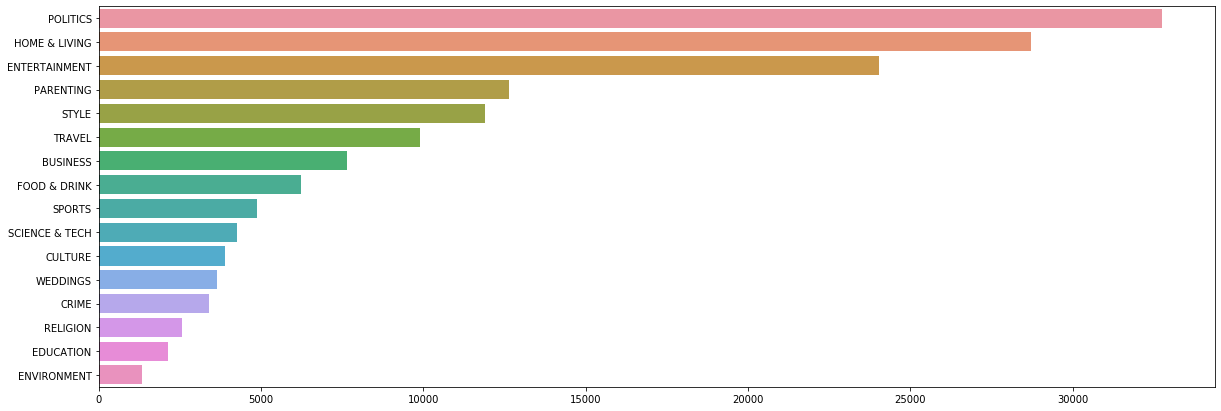

In [14]:
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(20,7))
#sns.countplot(x = 'category', data = new_df);
sns.barplot(y=new_df['category'].value_counts().index, x=new_df['category'].value_counts().values, orient='h')

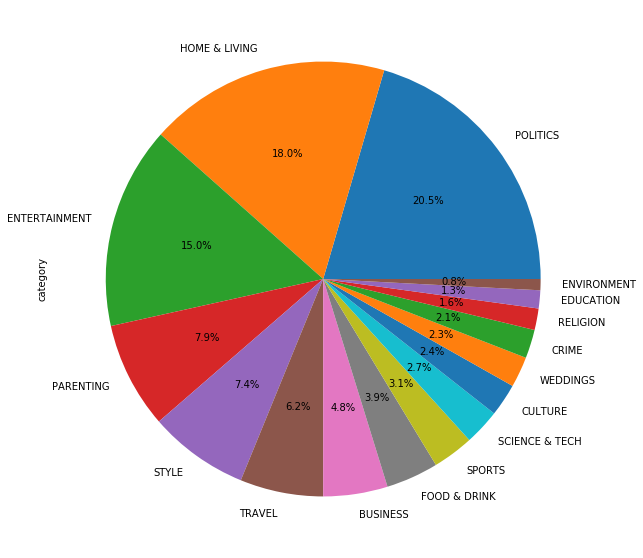

In [15]:
%matplotlib inline
new_df['category'].value_counts().plot.pie( autopct = '%1.1f%%', figsize = (10, 10));

#### We can see the Politics, Home & Living  and Entertainment contribute most of the news (almost 53%)

In [16]:
# Removing numerical entries/digits  from the "text" column since they dont provide much insights.
new_df.text=new_df.text.replace('[0-9]', '', regex = True)
new_df[:10]

,category,text
0,CRIME,"There Were Mass Shootings In Texas Last Week,..."
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The ...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age ...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...
6,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle I...
7,ENTERTAINMENT,What To Watch On Amazon Prime That’s New This ...
8,ENTERTAINMENT,Mike Myers Reveals He'd 'Like To' Do A Fourth ...
9,ENTERTAINMENT,What To Watch On Hulu That’s New This Week You...


In [17]:
# counting the number of words in each to exclude short news
total_words = []
for i in range(len(new_df)):
    total_words.append(len(new_df.text[i].split()))

In [18]:
new_df["total_words"] = total_words
new_df = new_df[new_df.total_words>10]
new_df[:10]

,category,text,total_words
0,CRIME,"There Were Mass Shootings In Texas Last Week,...",25
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The ...,19
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age ...,24
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,25
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,26
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,31
6,ENTERTAINMENT,Donald Trump Is Lovin' New McDonald's Jingle I...,15
7,ENTERTAINMENT,What To Watch On Amazon Prime That’s New This ...,17
8,ENTERTAINMENT,Mike Myers Reveals He'd 'Like To' Do A Fourth ...,25
9,ENTERTAINMENT,What To Watch On Hulu That’s New This Week You...,16


## Removing Stopwords and Lemmatization

In [19]:
lemmatizer = WordNetLemmatizer()
def textClean(text):
    text = re.sub("[^a-zA-Z]"," ",text).strip()
    text = nltk.word_tokenize(text.lower())
    stops = set(stopwords.words("english"))
    stops = list(stops)
    text = " ".join([lemmatizer.lemmatize(w) for w in text if w not in stops])
    return(text)
new_df['text'] = new_df.text.map(textClean)

In [20]:
#import nltk
#nltk.download('wordnet')

In [21]:
new_df.text[:10]

0    mass shooting texas last week tv left husband ...
1    smith join diplo nicky jam world cup official ...
2    hugh grant marries first time age actor longti...
3    jim carrey blast castrato adam schiff democrat...
4    julianna margulies us donald trump poop bag pi...
5    morgan freeman devastated sexual harassment cl...
6    donald trump lovin new mcdonald jingle tonight...
7    watch amazon prime new week great mini series ...
8    mike myers reveals like fourth austin power fi...
9    watch hulu new week getting recent academy awa...
Name: text, dtype: object

## Model Building

In [22]:
np.random.seed(42)

X = new_df['text']
y = new_df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

In [23]:
cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)
X_test_cv =cv.transform(X_test)
X_train_cv.shape, X_test_cv.shape

((118839, 61111), (29710, 61111))

In [24]:
cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)
X_test_cv =cv.transform(X_test)
X_train_cv.shape, X_test_cv.shape

((118839, 61111), (29710, 61111))

In [25]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [26]:
model_scores = fit_and_score(models=models,
                             X_train=X_train_cv,
                             X_test=X_test_cv,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.43567822282059915,
 'Logistic Regression': 0.758296869740828,
 'Random Forest': 0.6431167956916863}

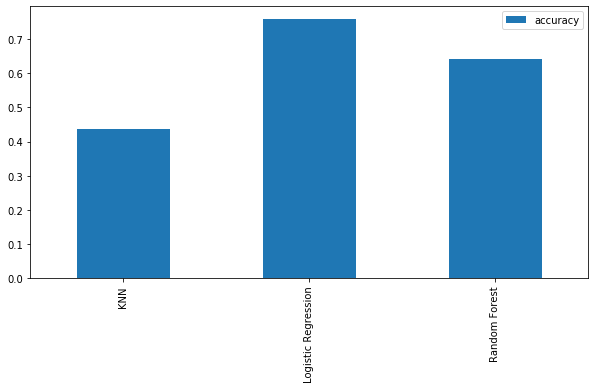

In [27]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar(figsize =(10, 5));


### HyperParamameter tuning with RandomizedSearchCV

Since KNN shows pretty low accuracy,tuning it would not increase the accuracy much. hence let's discard it and tune

* LogisticRegression()
* RandomForestClassifier()

In [28]:
# Hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 500, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [31]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_jobs= -1,
                                n_iter=10,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train_cv, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 30.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 43.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distribution...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test_cv, y_test)

0.7604510265903736

In [34]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_jobs=-1,
                           n_iter=10,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train_cv, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 29.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [35]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 4,
 'min_samples_leaf': 11,
 'max_depth': None}

In [36]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test_cv, y_test)

0.6457085156512958

### Hyperparamter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [38]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-3, 3, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          n_jobs=-1,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train_cv, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 49.0min finished


In [39]:
# Check the best hyperparmaters
gs_log_reg.best_params_

{'C': 0.3359818286283781, 'solver': 'liblinear'}

In [40]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test_cv, y_test)

0.7615281050151465

### Evaluting our tuned machine learning classifier, beyond accuracy

* Confusion Matrix
* Classification report
* Accuracy

To make comparisons and evaluate our trained model, first we need to make predictions.

In [41]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test_cv)

In [42]:
y_preds

array(['POLITICS', 'ENTERTAINMENT', 'TRAVEL', ..., 'HOME & LIVING',
       'STYLE', 'STYLE'], dtype=object)

In [44]:
y_test[:10]

85077           POLITICS
91933            CULTURE
99632             TRAVEL
158798     HOME & LIVING
5149      SCIENCE & TECH
55133             SPORTS
46251           POLITICS
112289         PARENTING
119629          WEDDINGS
69001           RELIGION
Name: category, dtype: object

In [52]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[ 681   11    4   13   60    6   20  183   38  171    3   30   13   24
    36    6]
 [   9  313    2    4   43    1    2   31   21   93    4    2   10    2
    11    3]
 [   7    1  324    2  159    0    6   83   21   46    3    9    4    7
    32    2]
 [  22    6    2  146   24    0    1   47   30   85    4    5    4    2
     4    0]
 [  32   20   49    4 3224    6   15  148   96  369    4   22   42   73
    35   22]
 [  16    3    1    0   19   85    4   43    7   43    2   18    2    3
    27    0]
 [  11    0    5    0   35    0  928  125   23   10    0    4    1   19
    42    2]
 [  83    6   26    6  133    6   86 4591  163  107    6   41   29   81
    62   13]
 [  19    5   13   17  129    4   16  314 1854   56    2   13   13   35
    26   10]
 [ 103   71    9   28  257   13    5  143   36 5412   37   29   22    8
    37    3]
 [   3    6    6    5   32    1    2   55   10   84  179    1    1    3
     8    1]
 [  47    4    9    3   85    6   10  132   21   54    3  371    

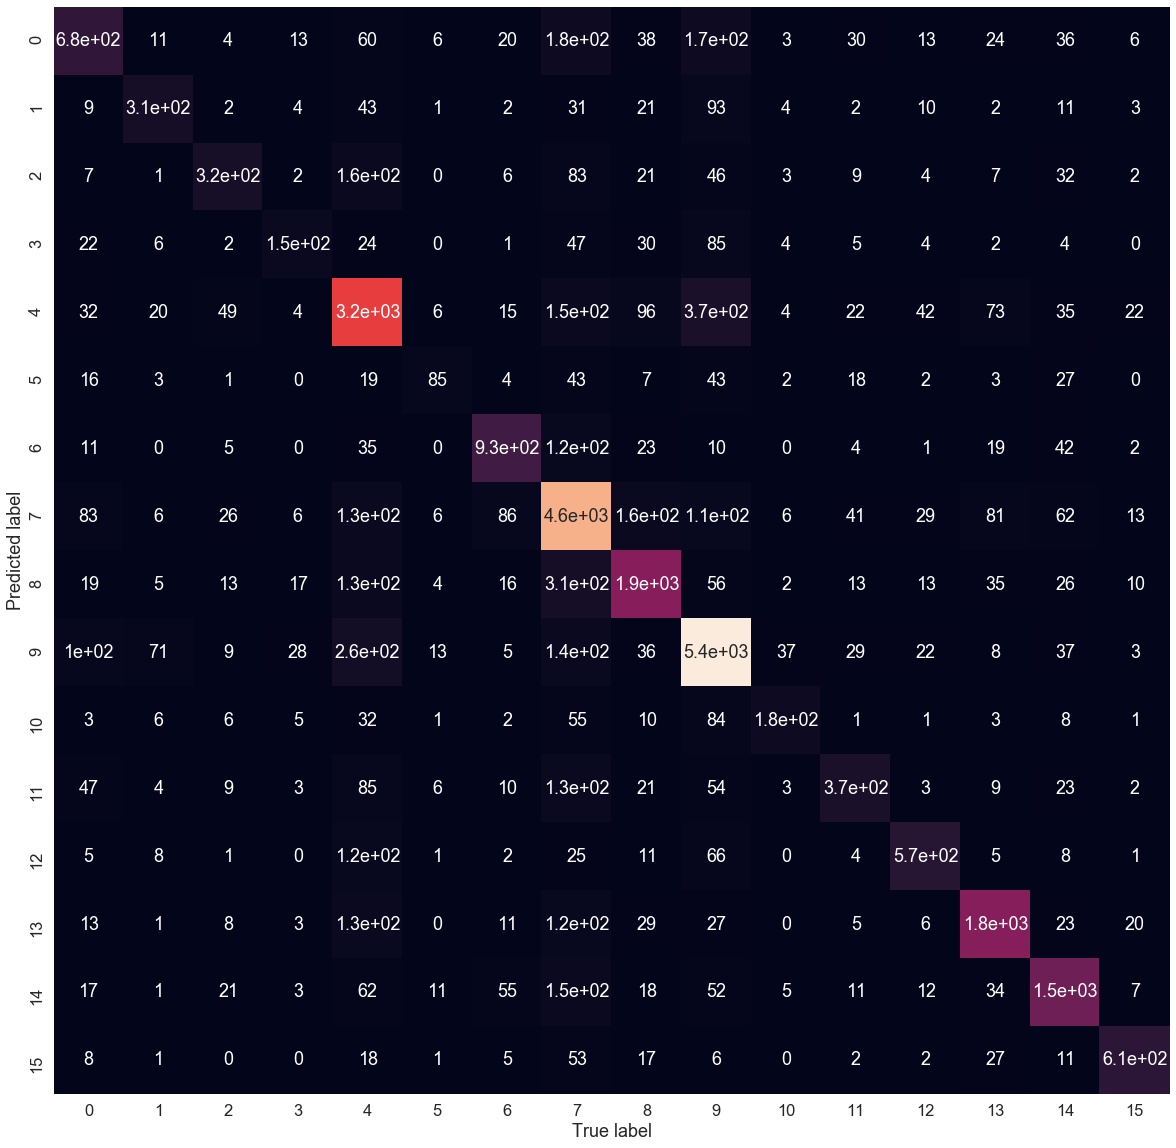

In [65]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
   
    fig, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test, y_preds)

### Calculate evaluation metrics using cross-validation
We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [66]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.3359818286283781, 'solver': 'liblinear'}

In [67]:
# Create a new classifier with best parameters
clf = LogisticRegression(C= 0.3359818286283781,
                         solver="liblinear")

In [62]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X_test_cv,
                         y_test,
                         cv=5,
                         scoring="accuracy")
cv_acc =np.mean(cv_acc)
cv_acc

0.7157866477377097

# got ERROR from below cell and so on..

In [70]:
#
# Cross-validated recall
# cv_recall = cross_val_score(clf,
#                          X,
#                          y,
#                          cv=5,
#                          scoring="recall")
# cv_recall

In [71]:

# Cross-validated f1-score
# cv_f1 = cross_val_score(clf,
#                         X_test_cv,
#                          y_test,
#                          cv=5,
#                          scoring="f1")
# cv_f1 = np.mean(cv_f1)
# cv_f1

In [ ]:
# # Visualize cross-validated metrics
# cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
#                            "Precision": cv_precision,
#                            "Recall": cv_recall,
#                            "F1": cv_f1},
#                           index=[0])

# cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
#                       legend=False);